In [19]:
import numpy as np
import pandas as pd
from scipy.stats import norm, kurtosis, skew

import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
#  Load in SPX data and keep only 1990 forward
SPX = pd.read_csv('SPX.csv')
SPX = SPX[ SPX['Date'] >= '1990-01-01']

#  Calculate the percent change and add it as a column to the data frame
SPX['pct'] = SPX['Close'].pct_change()

#  Break out the percent change as a numpy array for use outside pandas.
pct = SPX['pct'].to_numpy()

#  Calculate the mean and standard deviation using pandas built in functions.
mu = SPX['pct'].mean()
sigma = SPX['pct'].std()

#  Print those results
print('Mean = ', mu)
print('Standard Deviation = ', sigma)

Mean =  0.00033980999847684797
Standard Deviation =  0.010997593770525551


C:\Users\moone\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\moone\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0, 0.5, 'Normalized Count')

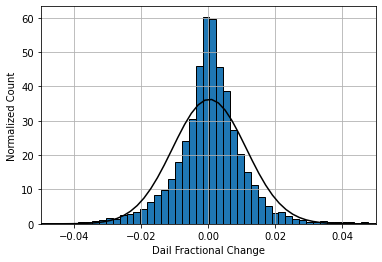

In [13]:
#  Generate a histogram and automatically scale by area under the curve
n, bins, patches = plt.hist(pct, bins = 100, density = True, edgecolor = 'black')

#  Use the mean and standard deviation from above to generate a normal curve with those inputs
x = np.linspace(-0.1, 0.1, 100)
y = norm.pdf(x, mu, sigma)

#  Overlay the noraml curve on the nistogram
plt.plot(x, y, 'k')
plt.xlim( [-0.05, 0.05]) 
plt.grid(True)
plt.xlabel('Dail Fractional Change')
plt.ylabel('Normalized Count')

In [14]:
#  Use the built-in Pandas kurtosis function
print( 'Kurtosis = ', SPX['pct'].kurtosis() )

Kurtosis =  8.913372915897058


In [15]:
#  The scipy function kurtosis can't handle NaNs without setting a flag
#  Instead of setting that flag, we can't just delete the offending entry.  In most cases, you probably want to use the flag.
print( 'Kurtosis = ', kurtosis( np.delete(pct, 0) ) )

Kurtosis =  8.9067205650687


In [21]:
#  For completeness, we'll also calculate the skewness
print('Skewness = ', SPX['pct'].skew() )

#  The Scipy function needs a flag set or to have NaNs deleted
print( skew( pct ) )

Skewness =  -0.0934098445545336
nan
